## Go to https://www.kaggle.com/c/titanic for more information on the dataset

### Step 1: import data/packages, get more information, and visualize how the features are related to survival

In [1]:
#imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
#read in the "train.csv" file downloaded and renamed from kaggle
titanic_df = pd.read_csv('titanic.csv')

In [3]:
#look at the first few rows of the dataframe
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [4]:
#describe what the data looks like
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#get more entries info 
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


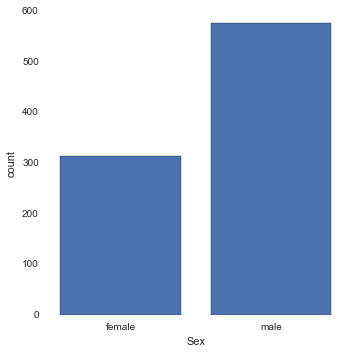

In [6]:
# how many males versus females were on the ship?
sns.factorplot('Sex',data=titanic_df)

In [7]:
# what was the mean age of the passengers?
titanic_df['Age'].mean()

29.69911764705882

In [8]:
# what was the median age of the passengers?
titanic_df['Age'].median()

28.0

In [9]:
# Since there are missing values in "Age", fill them with the mean age... will need it to fit a model later
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

In [10]:
# write a function that takes in the age and sex info on the passenger and categorizes them based on age
# if age < 16, then categorize as child, otherwise just indicate male or female
# save this info in a new column and add to the existing dataframe

def passengertype(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

titanic_df['Ptype'] = titanic_df[['Age','Sex']].apply(passengertype, axis=1)


In [11]:
# check if this worked!
titanic_df[0:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ptype
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,child


In [12]:
# how many of each category?
titanic_df['Ptype'].value_counts()

male      537
female    271
child      83
dtype: int64

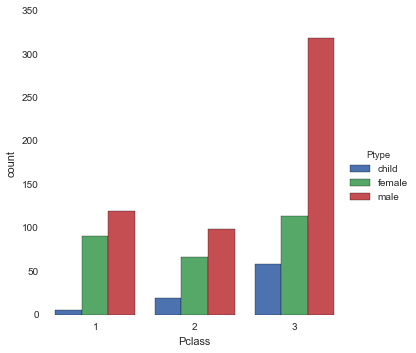

In [13]:
# how many of males, females and children were there in each passenger class?
sns.factorplot('Pclass',data=titanic_df,hue='Ptype')

In [14]:
# how many passengers traveled alone or with family? Add up the Siblings/Spouse column and Parent/Child columns
titanic_df['Alone'] = titanic_df['SibSp'] + titanic_df['Parch']

In [15]:
# see if this worked!
titanic_df[0:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ptype,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,male,0
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,male,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,male,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,child,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,female,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,child,1


In [16]:
# how many passengers traveled alone or with families?
titanic_df['Alone'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
dtype: int64

In [17]:
# Categorize "alone" passengers and "with family" passengers
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

/Users/Deepna/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
# see if this worked!
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ptype,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,male,Alone
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,male,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,male,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,child,With Family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,female,With Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,child,With Family


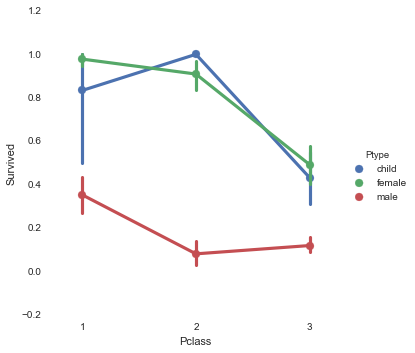

In [19]:
# visualize data based on how many of the males, females, and children in each passenger class survived
sns.factorplot('Pclass','Survived',data= titanic_df,hue='Ptype')

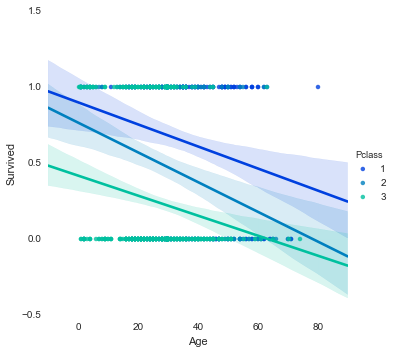

In [20]:
# visualize data based on which age group in the different passenger classes survived
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')

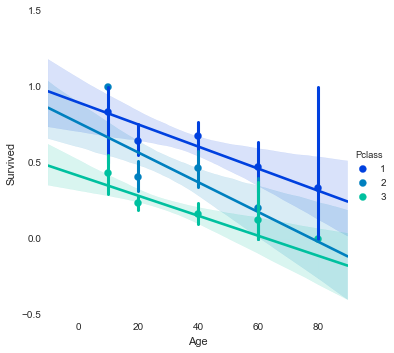

In [21]:
# visualize above with age binned by "generations"
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

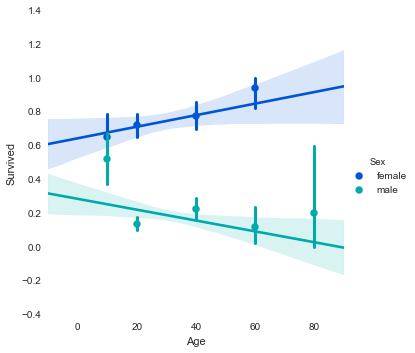

In [22]:
# how many males and females in each age group survived?
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

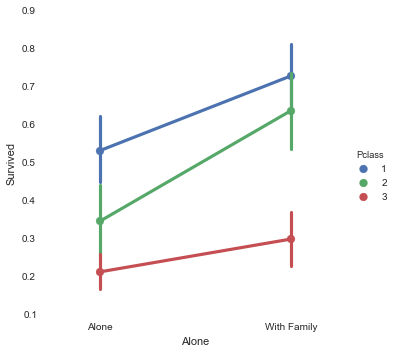

In [23]:
# how many alone/with family passengers survived from each passenger class?
sns.factorplot('Alone','Survived',data= titanic_df,hue='Pclass')

In [24]:
# "Cabin" column has lots of missing values; drop those values 
deck = titanic_df['Cabin'].dropna()

In [25]:
# what does it look like?
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

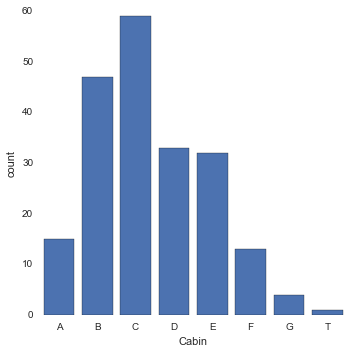

In [26]:
# Extract deck information from the "Cabin" column by pulling out the first letter of the cabin

# Set empty list
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])    

# Reset DataFrame and visualize the data
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

#cabin_df.columns = ['Cabin']
sns.factorplot('Cabin',data=cabin_df)

In [27]:
# looks like Deck "T" might be a typo, so drop it
cabin_df = cabin_df[cabin_df.Cabin != 'T']
titanic_df['Cabin'] = cabin_df

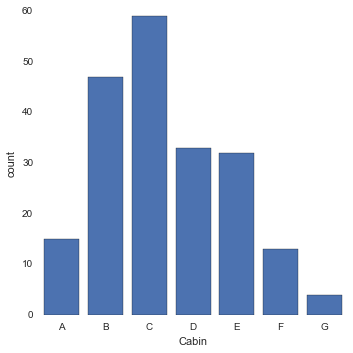

In [28]:
# now visualize it again
sns.factorplot('Cabin',data=cabin_df)

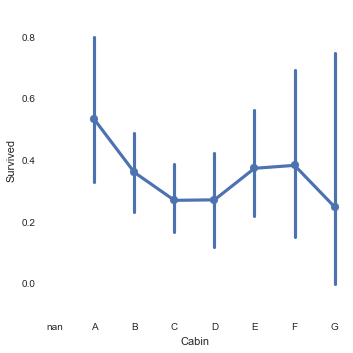

In [29]:
# visualize survival based on the deck of the passengers
sns.factorplot('Cabin', 'Survived', data = titanic_df)

### Need to convert the string variables into coded values for running the model

In [30]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ptype,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,C,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,E,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,G,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,C,S,male,Alone


In [31]:
# convert the two columns below from string to integer for model fitting

titanic_df['Ptype'] = titanic_df.Ptype.map({'male': 0, 'female': 1, 'child': 2})

titanic_df['Alone'] = titanic_df.Alone.map({'Alone': 0, 'With Family': 1})

In [32]:
# make sure it worked! 
titanic_df[860:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ptype,Alone
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.000000,2,0,350026,14.1083,NaN,S,0,1
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.000000,1,0,28134,11.5000,NaN,S,0,1
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.000000,0,0,17466,25.9292,NaN,S,1,0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S,1,1
864,865,0,2,"Gill, Mr. John William",male,24.000000,0,0,233866,13.0000,NaN,S,0,0
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.000000,0,0,236852,13.0000,NaN,S,1,0
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.000000,1,0,SC/PARIS 2149,13.8583,NaN,C,1,1
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.000000,0,0,PC 17590,50.4958,NaN,S,0,0
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S,0,0
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.000000,1,1,347742,11.1333,NaN,S,2,1


### Step 2: Logistic Regression

In [33]:
#imports for running a logistic regression model
import sklearn
from sklearn import linear_model

In [34]:
# define features and target
# note that I did not include 'cabin' due to all the missing values and lots of variance in the visualization earlier
X = titanic_df[['Age','Pclass','Ptype','Alone']]
Y = titanic_df['Survived']

In [35]:
# make sure there are no missing values in the features; otherwise model will not run
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age       891 non-null float64
Pclass    891 non-null int64
Ptype     891 non-null int64
Alone     891 non-null int64
dtypes: float64(1), int64(3)
memory usage: 34.8 KB


In [36]:
# did target variable work?
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [37]:
h = .02  # step size in the mesh

In [38]:
# fit the data
logreg = linear_model.LogisticRegression(C=1e5)

logreg.fit(X, Y)

logreg.score(X,Y)

0.77553310886644222

77% accuracy seems good, but what is the null error rate?

In [59]:
Y.mean()

0.38383838383838381

This shows that only 38% of the passengers survived. So, you would be 100-38 = 62% accurate if you always guessed "no" for survival. But with our model, you improve your accuracy to 77%. So, that's a good sign! Let's see how well our model does when we do cross-validation. 

### Logistic Regression Model Prediction

In [39]:
# Split the data into training and testing
feature_train,feature_test,target_train,target_test = sklearn.cross_validation.train_test_split(X,Y)

In [40]:
print feature_train.shape, feature_test.shape, target_train.shape , target_test.shape

(668, 4) (223, 4) (668,) (223,)


In [60]:
# fit the model on the training data
logreg2 = linear_model.LogisticRegression(C=1e5)

logreg2.fit(feature_train,target_train)

logreg2.score(feature_train,target_train)

0.77694610778443118

In [71]:
# call the predict function to see how well the model can predict the training data, but more importantly the testing data
pred_train = logreg2.predict(feature_train)
pred_test = logreg2.predict(feature_test)

#print the predicted class labels for the test set 
print pred_test[0:15]

[0 1 1 0 0 1 1 1 0 0 0 0 0 0 0]


In [67]:
# generate class probabilities for the test set
probs = logreg2.predict_proba(feature_test)
print probs[0:15]

[[ 0.63963647  0.36036353]
 [ 0.23374569  0.76625431]
 [ 0.17688896  0.82311104]
 [ 0.7351004   0.2648996 ]
 [ 0.63963647  0.36036353]
 [ 0.49446535  0.50553465]
 [ 0.40268614  0.59731386]
 [ 0.16748066  0.83251934]
 [ 0.90082736  0.09917264]
 [ 0.7987025   0.2012975 ]
 [ 0.9382367   0.0617633 ]
 [ 0.83386129  0.16613871]
 [ 0.90082736  0.09917264]
 [ 0.89672788  0.10327212]
 [ 0.89672788  0.10327212]]


Sanity check: the classifier is predicting "1" meaning "survived" anytime the probability in the second column above is > 0.5

In [75]:
# calculate and print the explained variance score (r-squared): 1 is perfect prediction
# calculate the AUC (Area under the curve) score

print('Variance score: %.2f' % logreg2.score(feature_test, target_test))

print('AUC score: %.2f' %metrics.roc_auc_score(target_test, probs[:, 1]))

Variance score: 0.76
AUC score: 0.81


We still get 76% accuracy on the test data and an AUC score of 0.81, which is good!

In [76]:
# confusion matrix and a classification report

from sklearn import metrics
from sklearn.cross_validation import cross_val_score

print metrics.confusion_matrix(target_test, predict_test)
print metrics.classification_report(target_test, predict_test)


[[116  25]
 [ 29  53]]
             precision    recall  f1-score   support

          0       0.80      0.82      0.81       141
          1       0.68      0.65      0.66        82

avg / total       0.76      0.76      0.76       223



now let's try a more rigorous cross-validation method... 10 fold cross-validation

In [78]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.71111111  0.75555556  0.71910112  0.80898876  0.80898876  0.78651685
  0.76404494  0.74157303  0.83146067  0.81818182]
0.774552264215


Great! the model is still performing at around 77%